# Estadística Descriptiva

## Tipos de datos

Todos los datos se pueden identificar en dos grupos fundamentales: **categóricos** y **numéricos**.

Los datos **categóricos** son aquellos que se refieren a agrupaciones, a grupos con características similares; por ejemplo: sexo, tipo de película, método de pago. 

Los datos categóricos pueden ser:
- **Ordinales**: cuando existe una relación de orden o jerarquía en las categorías; ejemplo: estrato socioeconómico.
- **Nominales**: cuando **no** hay relación de orden o jerarquía en las categorías; ejemplo: sexo.

Los datos **numéricos** como su nombre lo dice son números y podemos hacer con ellos operaciones; por ejemplo: la altura, la edad, la temperatura.

Los datos numéricos pueden ser:
- **Discretos**: hacen referencia a conteos y números enteros; ejemplo: la edad.
- **Continuos**: pueden tomar cualquier valor real; ejemplo: la altura. Los datos continuos se pueden clasificar en:
    - **Datos de intervalos**: representan unidades ordenadas que tienen la misma diferencia. Podemos sumar y restar, pero no podemos multiplicar, dividir o calcular razones. Debido a que no existe un cero verdadero, no se pueden aplicar muchas estadísticas descriptivas e inferenciales.
    - **Datos de relación**: también representan unidades ordenadas que tienen la misma diferencia pero aquí **sí** hay un cero absoluto.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cars = pd.read_csv("cars.csv")
cars.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


Podemos ver los tipos de datos de cada variable (columna) con *.dtypes*

In [2]:
cars.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

En Pandas los tipos de datos se identifican de la siguiente forma:
- Categóricos: object, bool.
- Numéricos: int64 (discreto), float64 (continuo).

Podemos generar un conjunto completo de estadísticos descriptivos del dataset usando *.describe( )*

Estos estadísticos son para variables numéricas.

In [3]:
cars.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## Medidas de tendencia central

Son medidas que nos ayudan a resumir una gran cantidad de información en un solo número.
- **Media**: es el promedio de todos los datos; es susceptible a valores atípicos.
- **Mediana**: es el dato central, es decir, hay la misma cantidad de elementos a la izquierda y a la derecha.
- **Moda**: es el dato que más se repite; no aplica para datos continuos.

**Media** = $$\frac{1}{n}\sum_{i = 1}^n x_i$$

**Mediana (impar)** = $$x_{(n + 1) / 2}^{\text{ordered}}$$

**Mediana (par)** = $$\frac{x_{n / 2}^{\text{ordered}} + x_{(n / 2) + 1}^{\text{ordered}}}{2}$$

**Moda** = $$x_k$$ donde $$\text{Freq}(x_k) = \max{(\text{Freq}(x_i))}$$

![](tab-freq.jpg)

Desventajas de la media
- Es sensible a los valores extremos. Si alguno de los valores es extremadamente grande o extre-madamente pequeño, la media no es el promedio apropiado para representar la serie de datos.
- No es recomendable emplearla en distribuciones muy asimétricas.
- Si se emplean variables discretas o cuasi-cualitativas, la media aritmética puede no pertenecer al conjunto de valores de la variable.

Existen otros tipos de medias que son utilizadas también:

- Media recortada: se ordenan los valores y se quita un par (o más) de los valores más extremos (el menor y el mayor). Se realiza cuando existen outliers.

- Media ponderada (weighted mean): a cada valor se le asigna un peso w. La media ponderada se calcula con la suma de los valores por sus pesos respectivos, dividido entre la suma de los pesos. Se utiliza mucho esta media cuando hay valores con mucha variabilidad (a estos se les asigna un peso menor). Por ejemplo, si tuviéramos un conjunto de sensores y conocemos que un sensor en específico no arroja valores tan precisos, a sus valores los multiplicaríamos por un peso menor.

![](medias.jpg)

Inspeccionemos el atributo *price_usd* (variable numérica continua) de los carros listados en el dataset.

Media

In [4]:
cars["price_usd"].mean()

6639.971021255604

Mediana

In [5]:
cars["price_usd"].median()

4800.0

Histograma

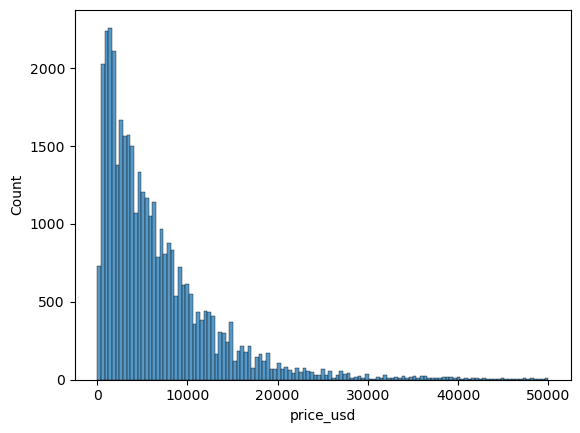

In [6]:
sns.histplot(data = cars, x = "price_usd")
plt.show()

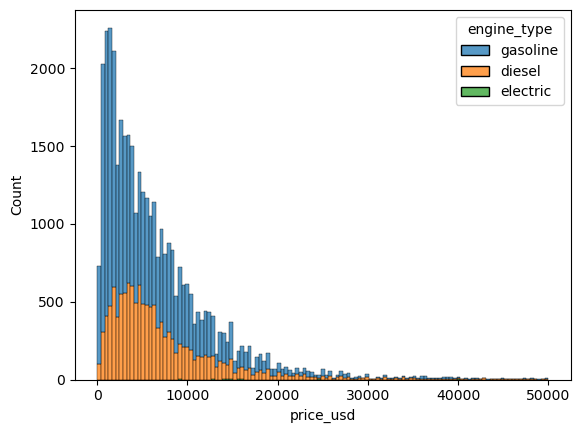

In [7]:
sns.histplot(data = cars, x = "price_usd", hue = "engine_type", multiple = "stack")
plt.show()

Hay un problema y es que no se ven los carros eléctricos; esto puede deberse a que son muy pocos.

Para solucionar esto podemos utilizar una tabla y agrupar los datos por el tipo del motor.

In [8]:
cars.groupby("engine_type").count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


Inspeccionemos precios de una marca y modelo particular.

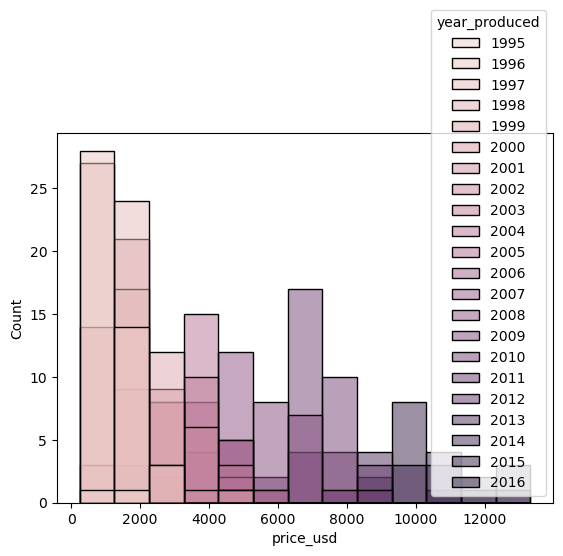

In [9]:
renaultMegane = cars[(cars['manufacturer_name'] == 'Renault') & (cars['model_name'] == 'Megane')]
sns.histplot(data = renaultMegane, x = 'price_usd', hue = 'year_produced')
plt.show()

## Medidas de dispersión

Son medidas que nos ayudan a cuantificar la dispersión de los datos, qué tan alejados están entre sí.

- **Rango**: es la diferencia entre el valor mínimo y el valor máximo.
- **Cuartiles**: los cuartiles son valores que dividen la muestra de datos en partes iguales.
    - **Cuartil cero (Q0)**: es el valor mínimo.
    - **Primer cuartil (Q1)**: el 25% de los datos es menor o igual a este valor.
    - **Segundo cuartil (Q2) o mediana**: el 50% de los datos es menor o igual a este valor.
    - **Tercer cuartil (Q3)**: el 75% de los datos es menor o igual a este valor.
    - **Cuarto cuartil (Q4) o valor máximo**: el 100% de los datos es menor o igual a este valor
- **Rango intercuartil (IQR)**: es la distrancia entre el primer cuartil **Q1** y el tercer cuartil **Q2**; se abarca el 50% central de los datos.

![](medidas-dispersion.PNG)

- **Varianza muestral**: indica qué tan dispersos están los datos con respecto a la media. 
![](varianza.PNG)
- **Desviación estándar**: indica qué tan dispersos están los datos con respecto a la media. Es la raíz cuadrada de la varianza muestral.
- **Coeficiente de variación**: se utiliza para comparar la dispersión (variación) de conjuntos de datos de medidas diferentes o con medias aritméticas diferentes. Es la división de la desviación estándar entre la media.


Los datos atípicos **outliers** son aquellos que se salen del intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]. Esto funciona para distribuciones simétricas como la normal.

Para distribuciones no simétricas o sesgadas es necesario hacer una generalización del intervalo siendo este <br> 
[Q1 - 1.5 * f(IQR), Q3 + 1.5 * g(IQR)] donde *f* y *g* son funciones cualquiera que dependen del rango intercuartil.

![](asimetria.PNG)

Desviación estándar

In [10]:
cars["price_usd"].std()

6428.152018202915

Rango

In [11]:
rango = cars["price_usd"].max() - cars["price_usd"].min()
rango

49999.0

Quartiles

In [12]:
mediana = cars["price_usd"].median()
q1 = cars["price_usd"].quantile(q = 0.25)
q3 = cars["price_usd"].quantile(q = 0.75)
min = cars["price_usd"].quantile(q = 0)
max = cars["price_usd"].quantile(q = 1)
print(min, q1, mediana, q3, max)

1.0 2100.0 4800.0 8990.0 50000.0


Rango intercuartil

In [13]:
iqr = q3 - q1
iqr

6890.0

Rango para la detección de Outliers

In [14]:
limiteInferior = q1 - 1.5 * iqr
limiteSuperior = q3 + 1.5 * iqr
print(f"Rango para la detección de los datos atípicos: [{limiteInferior}, {limiteSuperior}]")

Rango para la detección de los datos atípicos: [-8235.0, 19325.0]


Visualización de Outliers

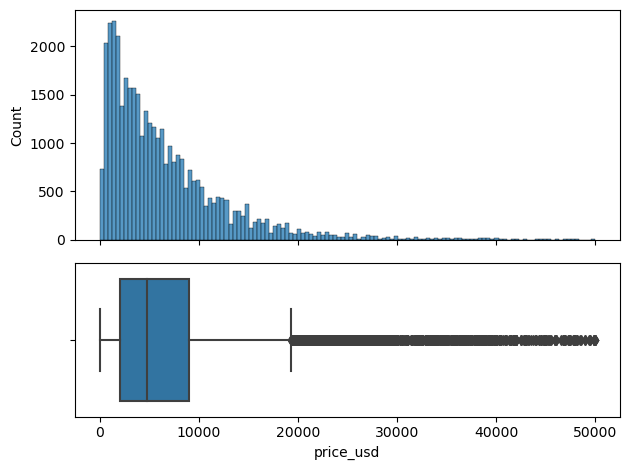

In [15]:
figura, (axesHist, axesBox) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.6, .4)})
sns.histplot(data = cars, x = "price_usd", ax = axesHist)
sns.boxplot(data = cars, x = "price_usd", ax = axesBox)
figura.tight_layout()

Podemos ver que la distribución para el precio tiene una tendencia a la izquierda.

Diagrama de cajas por categorías

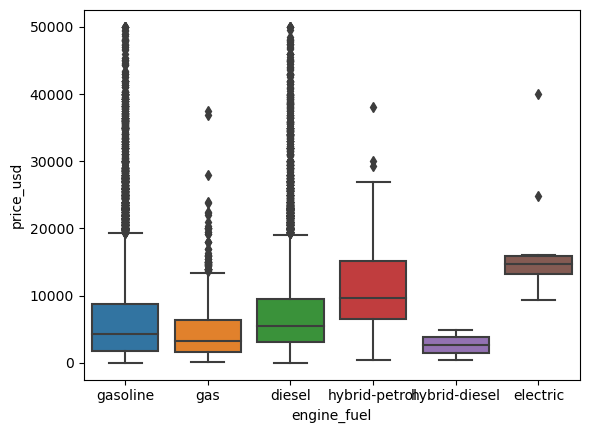

In [16]:
sns.boxplot(data = cars, x = "engine_fuel", y = "price_usd")
plt.show()

## Exploración visual de los datos

Una imagen vale más que mil palabras.

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Un flujo de trabajo usual es Scatterplot, Joinplot, Boxplot y Barplot.

Scatterplot

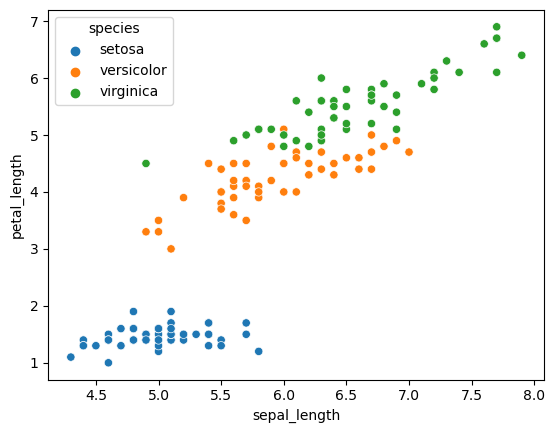

In [18]:
sns.scatterplot(data = iris, x = "sepal_length", y = "petal_length", hue = "species")
plt.show()

Vemos que hay claras diferencias dependiendo de la especie de la flor.

Joinplot

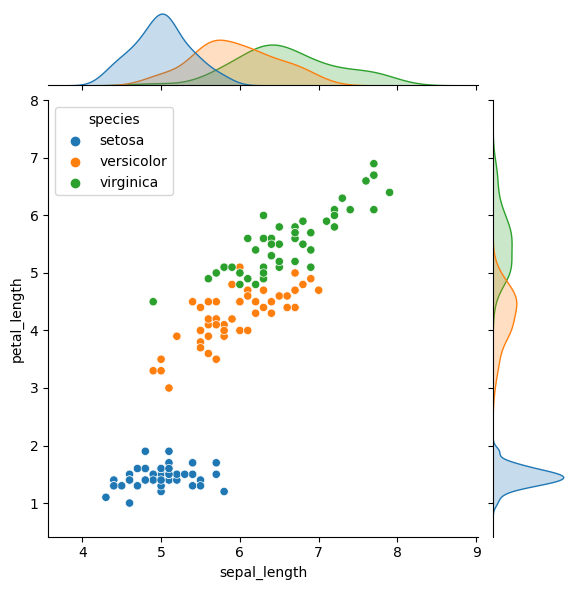

In [19]:
sns.jointplot(data = iris, x = "sepal_length", y = "petal_length", hue = "species")
plt.show()

Boxplot

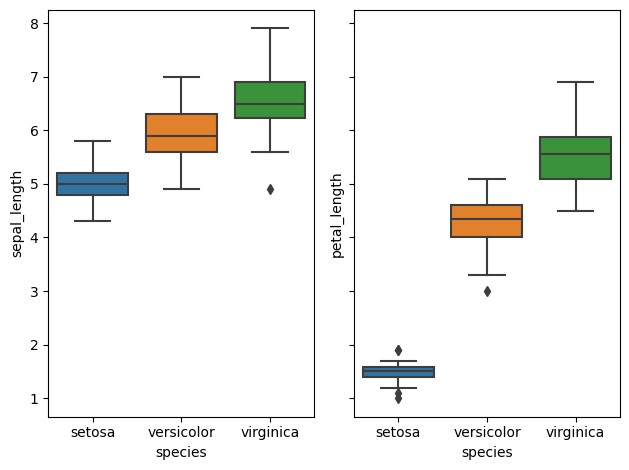

In [20]:
figura, (axesSepal, axesPetal) = plt.subplots(1, 2, sharey = True )
sns.boxplot(data = iris, x = "species", y = "sepal_length", ax = axesSepal)
sns.boxplot(data = iris, x = "species", y = "petal_length", ax = axesPetal)
figura.tight_layout()

Barplot

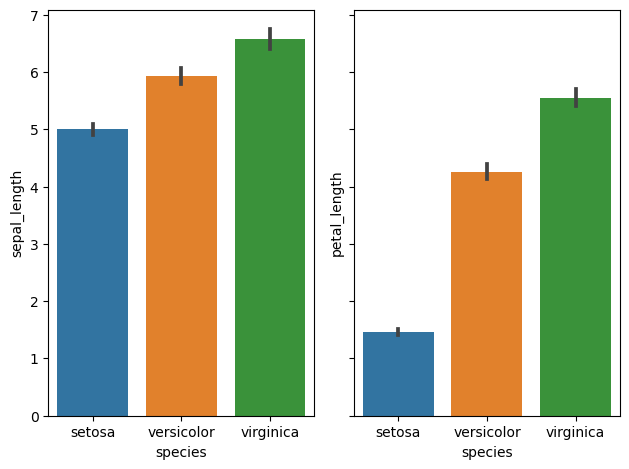

In [21]:
figura, (axesSepal, axesPetal) = plt.subplots(1, 2, sharey = True )
sns.barplot(data = iris, x = "species", y = "sepal_length", ax = axesSepal)
sns.barplot(data = iris, x = "species", y = "petal_length", ax = axesPetal)
figura.tight_layout()

## Pipelines de procesamiento para variables numéricas

### Normalización

La normalización es una técnica que a menudo se aplica como parte de la preparación de datos para el aprendizaje automático. El objetivo de la normalización es cambiar los valores de las columnas numéricas en el conjunto de datos para usar una escala común, sin distorsionar las diferencias en los rangos de valores ni perder información. La normalización también es necesaria para que algunos algoritmos modelen los datos correctamente.

### Transformacion lineal

Hay diferentes tipos de normalización lineal: 
- Zscore: convierte todos los valores en una puntuación z. Los valores de la columna se transforman mediante la siguiente fórmula <br>
![](zscore.png) <br>
La media y la desviación estándar se calculan para cada columna por separado. Se utiliza la desviación estándar de la población.

- MinMax : el normalizador min-max cambia la escala linealmente cada característica al intervalo [0,1]. El cambio de escala al intervalo [0,1] se realiza cambiando los valores de cada característica para que el valor mínimo sea 0, y luego dividiendo por el nuevo valor máximo (que es la diferencia entre los valores máximo y mínimo originales). Los valores de la columna se transforman mediante la siguiente fórmula <br>
![](minmax.png)

La normalización lineal se usa cuando los datos están uniformemente distribuidos.

### Transformación no lineal

Es bueno usarlos en el caso donde haya datos fuertemente sesgados y no simétricos.

Se usan justo antes de la normalización lineal ya que las transformaciones no lineales solo son para que los datos queden lineales y de esta forma se les pueda aplicar una normalización lineal; siempre es necesario aplicar la normalización lineal.

Algunos tipos son:
- Logística: los valores de la columna se transforman mediante la siguiente fórmula <br>
![](logistica.png) <br>
- LogNormal: esta opción convierte todos los valores a una escala logarítmica normal. Los valores de la columna se transforman mediante la siguiente fórmula <br>
![](lognormal.png) <br>
Aquí μ y σ son los parámetros de la distribución, calculados empíricamente a partir de los datos como estimaciones de máxima verosimilitud, para cada columna por separado. <br>
- TanH: todos los valores se convierten a una tangente hiperbólica. Los valores de la columna se transforman mediante la siguiente fórmula <br>
![](tang.png)



### Escalamiento de datos numéricos

#### Transformaciones lineales

In [22]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

"""
Cargamos un dataset y decimos que queremos separarlo en una matriz X que va a tener los datos que usaremos para 
predecir los datos del vector Y
"""
X, y = datasets.load_diabetes(return_X_y = True)
"""
X tiene un shape de (442, 10) y en nuestro caso solo queremos utilizar una columna así que 
Tomamos todas las columnas y filas de X
Seleccionamos la tercera columna que será con la que trabajaremos
"""
raw = X[:, None, 2]
raw

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

Los datos del dataset ya vienen pre-escalados y centrados en la media.

Escalamiento MinMax

In [23]:
maxRaw = max(raw)
minRaw = min(raw)
scaled = (raw - minRaw) / (maxRaw - minRaw)

TypeError: 'numpy.float64' object is not callable

ZScore

In [ ]:
media = np.average(raw)
desv = np.std(raw)
zScaled = (raw - media) / desv

Visualización de los datos crudos, con MinMax y con ZScore

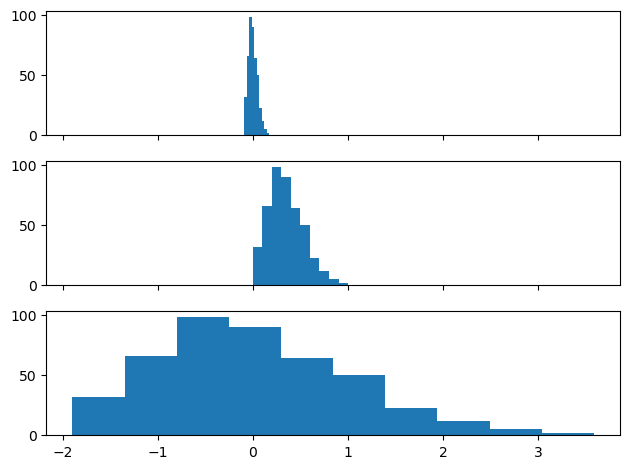

In [ ]:
figura, axes = plt.subplots(3, 1, sharex = True)
# Datos crudos
axes[0].hist(raw)
axes[1].hist(scaled)
axes[2].hist(zScaled)
figura.tight_layout()

- MinMax es mejor para datos uniformemente distribuidos.
- ZScore es mejor para datos distribuidos normalmente.

#### Transformaciones no lineales

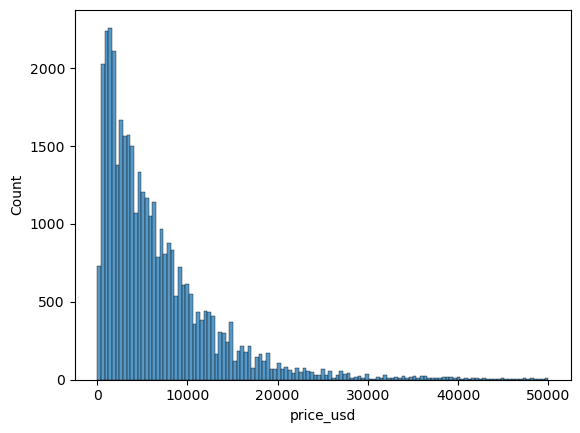

In [ ]:
df = pd.read_csv('cars.csv')
sns.histplot(data = df, x = "price_usd")
plt.show()


Vemos que los datos tienen un sesgo hacia la izquierda. Aplicando una transformación no lineal con *tanh(x)* obtenemos lo siguiente

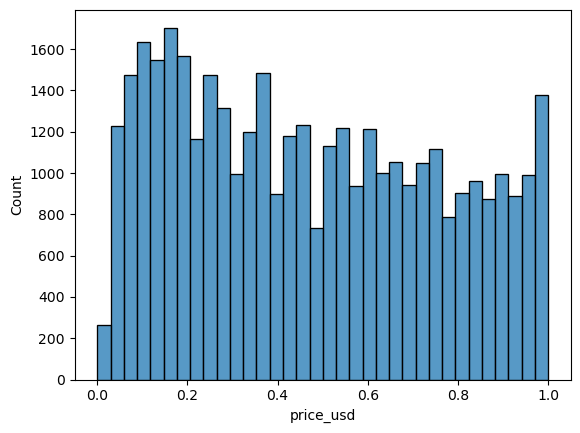

In [ ]:
# Definimos el parámetro *a* de calibración
a = 10000
# Hacemos la transformación
precioTransformado = df.price_usd.apply(lambda x: np.tanh(x / a))
sns.histplot(data = df, x = precioTransformado)
plt.show()

## Pipelines para el procesamiento de variables categóricas

Para variables categóricas se hace un mapeo numérico. Para eso hay 2 métodos, de manera que sean fácilmente interpretables en modelos de machine learning:
- Dummy: es la representación más compacta que se puede tener de los datos. Es mejor usarla cuando los inputs son variables linealmente independientes (no tienen un grado de correlación significativo). Es decir, las cuando se sabe que las categorías son independientes entre sí.
- One-hot: es más extenso. Permite incluir categorías que no estaban en el dataset inicialmente. De forma que si se filtra una categoría que no estaba incluida, igual se pueda representar numéricamente y no de error en el modelo (este modelo es más cool y es el que se usa). Generalmente no tiene un buen desempeño si la variable categórica toma un gran número de valores (por ejemplo, 15 valores diferentes).

![](categorias.PNG)

Con Pandas

In [ ]:
df = pd.read_csv('cars.csv')
# get_dummies realmente es un One Hot Encoder
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


Hay errores en la notación de Pandas y los tratan como que ambos modelos son lo mismo, pero en la realidad el Dummy no se usa. Aún así, en Pandas el método es *.get_dummies()*.

One Hot Encoder con SciKit

In [ ]:
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

Si agregamos un valor que no estaba en la categoría vemos que ocurre lo siguiente

In [ ]:
encoder.fit(df[['engine_type']].values)
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

Variables numéricas discretas pueden ser codificadas como categoricas

In [ ]:
encoder.fit(df[['year_produced']].values)
encoder.transform([[2016],[2009],[190]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

La decodificación de variables categóricas a numéricas implica que cada elemento del nuevo vector se interpreta como una nueva variable. Por tanto, aumenta la dimensión del dataset y el tiempo de procesamiento.

## Correlación

La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas **linealmente**.

- **Covarianza**: es un valor que indica el grado de variación conjunto de dos variables aleatorias respecto a su media <br>
![](covariance_formula.svg) <br>
- **Coeficiente de correlación**: es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables <br>
![](coeficiente-correlacion.jpg) <br>
También se puede expresar como <br>
![](correlacion-.PNG)<br>
El coeficiente de relación de esta manera tiene en cuenta que los datos pueden tener diferentes escalas.

**Correlación gráficamente**
![](correlacion.png)



Siempre debemos considerar que correlación **no implica** causalidad: "Cum hoc ergo propter hoc".

## Matriz de covarianza

Una matriz de varianzas-covarianzas es una matriz cuadrada que contiene las varianzas y covarianzas asociadas con diferentes variables. Los elementos de la diagonal de la matriz contienen las varianzas de las variables, mientras que los elementos que se encuentran fuera de la diagonal contienen las covarianzas entre todos los pares posibles de variables.

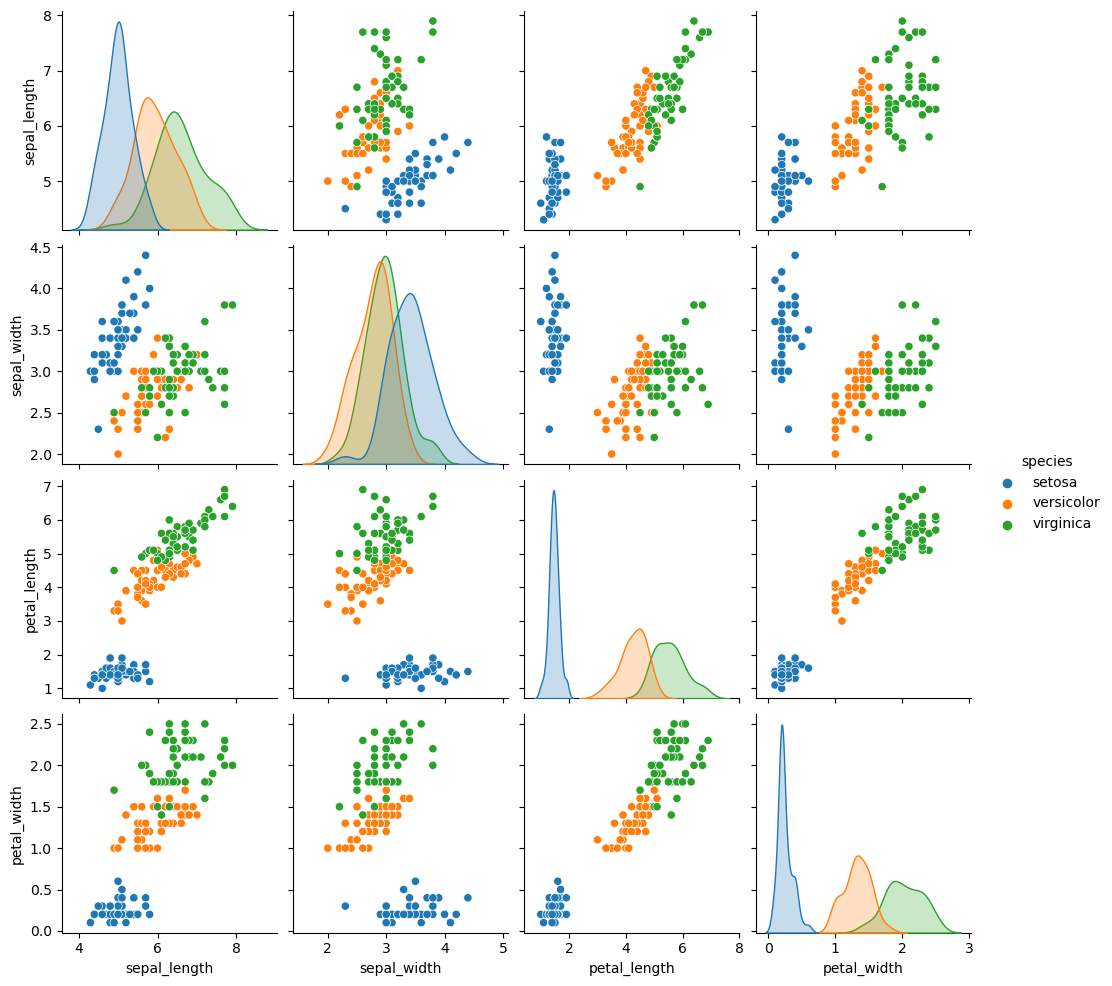

In [25]:
sns.pairplot(iris, hue = 'species')
plt.show()

¿Qué hace el StandardScaler() de Scikit Learn?

Normaliza los datos restando el promedio y dividiendo sobre la desviación estándar en cada variable (Z-Score).

Para calcular la matriz de correlaciones hay que obtener la transpuesta del Array con los datos escalados.

¿Cómo se calcula la matriz de covarianza con Python?
- Método cov() de Numpy: covariance_matrix = np.cov(scaled.T)
- Método corr() de Pandas: corr_matrix = df.corr()


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [27]:
matrizCovarianza = np.cov(scaled.T)
matrizCovarianza

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

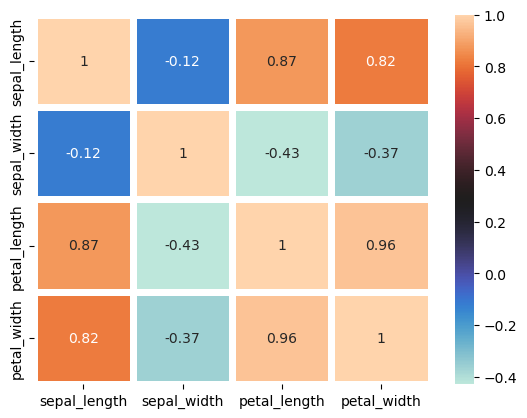

In [35]:
matrizCorrelacion = iris.corr()
sns.heatmap(matrizCorrelacion, annot = True, cmap = "icefire", linewidths = 5)
plt.show()

## Análisis de Componentes Principales (PCA)

El análisis de componentes principales (Principal Component Analysis) o PCA es una herramienta para el análisis exploratorio de los datos que permite visualizar la variación presente de un set de datos con muchas variables.

De manera general, el PCA es un tipo de transformación lineal de un set de datos con un cierto número de variables. Dicha transformación ajusta el est de datos a un nuevo sistema de coordenadas de manera que la mayor propoción de la varianza se explica en la primera coordenada y cada coordenada subsiguiente es ortogonal a la anterior y explica una menor variabilidad.

Una de las principales aplicaciones de PCA es la reducción de dimensionalidad (es decir, variables): cuando contamos con un gran número de variables cuantitativas posiblemente correlacionadas (indicativo de existencia de información redundante), un PCA permite “reducirlas” a un número menor de variables transformadas (componentes principales) que expliquen gran parte de la variabilidad de los datos.

Los valores propios y los vectores propios caracterizan completamente la varianza de un conjunto de datos.

### Reducción de dimensionalidad con PCA

In [36]:
# Escalador ZScore
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
)
matrizCovarianza = np.cov(scaled.T)
matrizCovarianza


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Vamos a identificar cuál es el mínimo número de variables que necesitamos para describir nuestro dataset

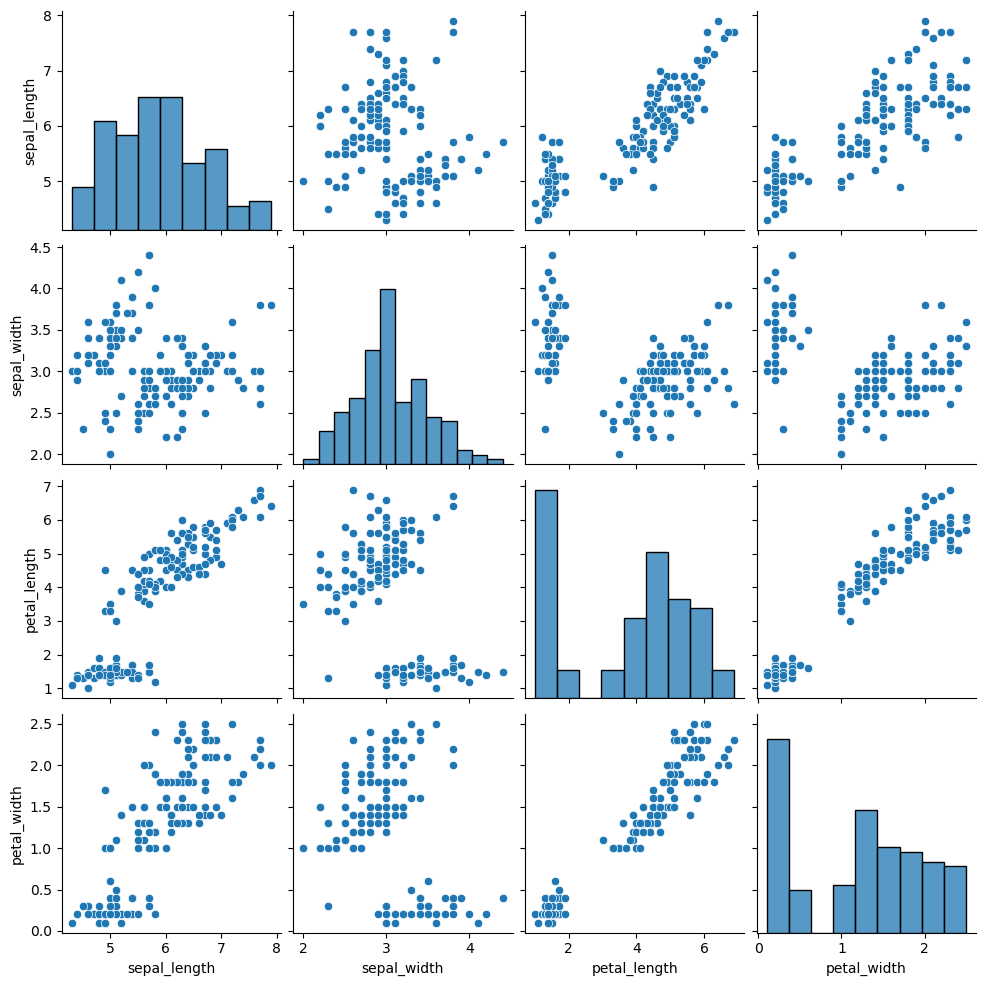

In [37]:
sns.pairplot(iris)
plt.show()

Primero visualizamos dónde puede haber una buena correlación; en este caso podemos observar que entre *petal_length* y *petal_width* parece haber una buena correlación. Nos enfocaremos en esos datos.

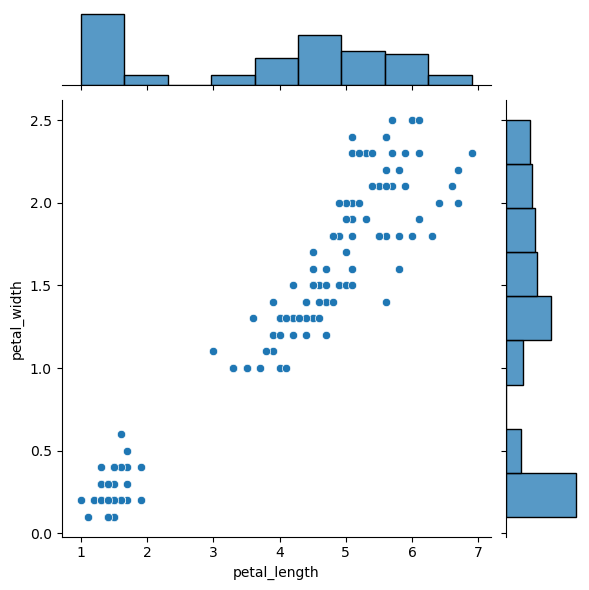

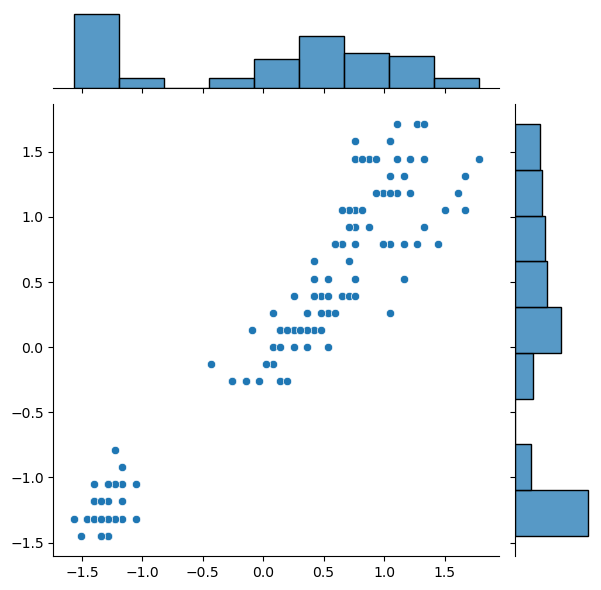

In [39]:
sns.jointplot(data = iris, x = "petal_length", y = "petal_width")
# Gráfico con los datos escalados
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])
plt.show()

Calculamos la descomposición de los vectores y valores propios de nuestra matriz de covarianza.

In [41]:
valoresPropios, vectoresPropios = np.linalg.eig(matrizCovarianza)
print(valoresPropios)
print(vectoresPropios)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Cada vector y valor propio capta la mayor cantidad de varianza de los datos principales. Cada una de las direcciones se le llama dirección principal; cada vector propio es una de las direcciones principales a lo largo de la cual capturamos varianza de los datos originales.

Para ver esto de una mejor manera crearemos una lista donde estará el porcentaje de varianza que cada valor propio explica:


In [42]:
varianzaExplicada = []
for valor in valoresPropios:
    varianzaExplicada.append((valor / sum(valoresPropios)) * 100)
print(varianzaExplicada)

[72.96244541329987, 22.850761786701757, 3.6689218892828825, 0.5178709107154802]


Como vemos, la primera compomente captura cerca del 73% de la varianza total de las cuatro dimensiones.
Esto nos indica que una cuarta componente podría ser prescindible y tal vez también una tercera si estamos dispuestos a sacrificar esa varianza.

Ahora, utilizaremos Scikit para hacer la reducción de dimensionalidad a dos componentes

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
# Tengo que pasarle los datos ESCALADOS
pca.fit(scaled)

PCA(n_components=2)

Puedo ver la varianza explicada por cada componente; en este caso, la primera captura cerca del 73% y la segunda aproximadamente el 23%

In [44]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Ahora hacemos la reducción de los datos; acabamos de crear nuevas variables que surgen de la combinación de las variables antiguas y esas nuevas variables las voy a mandar al modelo que necesite.

In [46]:
escaladasReducidas = pca.transform(scaled)
escaladasReducidas

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

Ahora miramos cómo se ve este nuevo dataset respecto a la especie de la flor

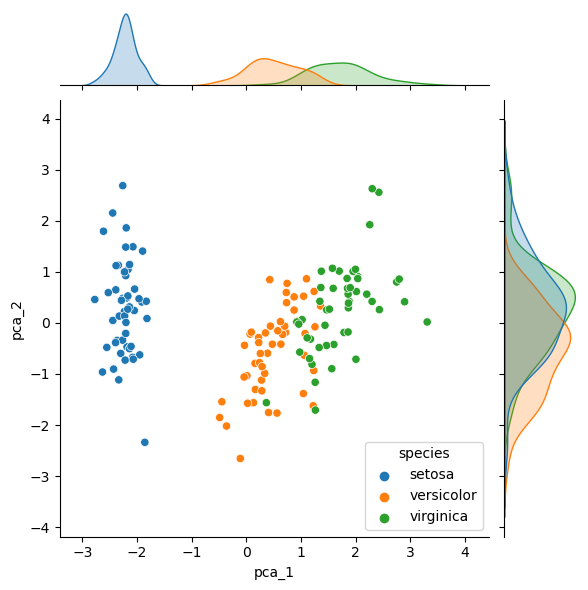

In [49]:
iris['pca_1'] = escaladasReducidas[:, 0]
iris['pca_2'] = escaladasReducidas[:, 1]
sns.jointplot(x = iris['pca_1'], y = iris['pca_2'], hue = iris['species'])
plt.show()

Esta distribución contempla cerca del 95% de los datos pero con solo dos variables.

Este formato numérico presenta la mayor cantidad de información con menos variables y ya podría usarlo para modelos.